#Preparação de dados para precificação de hospedagens

---



# Nova seção

In [ ]:
import pandas as pd


In [ ]:
dados =pd.read_json('/content/dados_hospedagem.json')
dados.head()

,info_moveis
0,"{'avaliacao_geral': '10.0', 'experiencia_local..."
1,"{'avaliacao_geral': '10.0', 'experiencia_local..."
2,"{'avaliacao_geral': '10.0', 'experiencia_local..."
3,"{'avaliacao_geral': '10.0', 'experiencia_local..."
4,"{'avaliacao_geral': '10.0', 'experiencia_local..."


#Como os dados estão em forma de dicionário, precisamos normalizar


In [ ]:

dados = pd.json_normalize(dados['info_moveis'])
dados

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,nan,--,5,[Our cozy little bungalow is the perfect place...,[The Queen Anne neighborhood is one of the mos...,"[1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, ...","[2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...","[3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, ...","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{""Cable TV"",""Wireless Internet"",Kitchen,""Free...","[$250.00, $200.00, $0, $0, $0, $200.00, $350.0...","[$35.00, $50.00, $100.00, $100.00, $0, $30.00,...","[$150.00, $200.00, $143.00, $150.00, $350.00, ..."
66,nan,--,6,[Bright clean 2 bedroom 1 bath appartment in t...,[Ballard is the most interesting and ecclectic...,"[1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, ...","[2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 4, 3, 3, ...","[3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 4, 3, ...","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,""Cable TV"",Internet,""Wireless Internet"",K...","[$200.00, $200.00, $100.00, $0, $0, $750.00, $...","[$0, $0, $100.00, $0, $75.00, $140.00, $112.00...","[$99.00, $185.00, $250.00, $200.00, $275.00, $..."
67,nan,--,7,[Beautiful end-unit townhome with lots of dayl...,"[Cherry blossoms (Sakura) in the spring, every...","[4, 3, 1, 2, 2, 1, 2, 1, 2, 2]","[3, 4, 3, 3, 3, 3, 3, 3, 3, 4]","[3, 5, 1, 5, 3, 2, 3, 4, 4, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$750.00, $350.00, $500.00, $500.00, $0, $200....","[$300.00, $90.00, $250.00, $100.00, $109.00, $...","[$218.00, $350.00, $450.00, $149.00, $99.00, $..."
68,nan,--,8,[Heart of Ballard new townhome with 4 BRs + ba...,"[--, --, The suite is conveniently located off...","[2, 2, 3, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, ...","[4, 2, 3, 4, 3, 3, 4, 4, 3, 5, 2, 3, 3, 4, 5, ...","

#Na tabela, muitos dados estão agrupados e para possibilitar o trabalho, vamos precisar desagrupar


In [ ]:
colunas = list(dados.columns)
colunas

['avaliacao_geral',
 'experiencia_local',
 'max_hospedes',
 'descricao_local',
 'descricao_vizinhanca',
 'quantidade_banheiros',
 'quantidade_quartos',
 'quantidade_camas',
 'modelo_cama',
 'comodidades',
 'taxa_deposito',
 'taxa_limpeza',
 'preco']

#Precisamos desagrupar os dados a partir do indice 3


In [ ]:
dados = dados.explode(colunas[3:])
dados


,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,nan,--,8,Beautiful craftsman home in the historic Wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$178.00,$299.00
68,nan,--,8,Located in a very easily accessible area of Se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$0,$99.00,$199.00
68,nan,--,8,This home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0,$0,$400.00
69,nan,--,9,This business-themed modern home features: *H...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$150.00,$250.00


#Como os índices se repetem, precisamos resetar os índices

#Resetar os indices


In [ ]:
dados = dados.reset_index(drop=True)
dados

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,nan,--,8,Beautiful craftsman home in the historic Wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$178.00,$299.00
3814,nan,--,8,Located in a very easily accessible area of Se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$0,$99.00,$199.00
3815,nan,--,8,This home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0,$0,$400.00
3816,nan,--,9,This business-themed modern home features: *H...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$150.00,$250.00


#TRATAMENTO DOS DADOS


#Tokenizando o texto na coluna descrição_local


In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.lower()
dados

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,this clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,our century old upper queen anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,very lovely and cozy room for one. convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,the “studio at mibbett hollow' is in a beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,nan,--,8,beautiful craftsman home in the historic wedgw...,--,3,4,5,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$178.00,$299.00
3814,nan,--,8,located in a very easily accessible area of se...,"Quiet, dead end street near I-5. The proximity...",2,4,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$0,$99.00,$199.00
3815,nan,--,8,this home is fully furnished and available wee...,--,1,3,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$0,$0,$400.00
3816,nan,--,9,this business-themed modern home features: *h...,Your hosts made Madison Valley their home when...,2,3,6,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",$150.00,$250.00


#Retirar caracteres que não trazem informação com o método regex

In [ ]:
dados['descricao_local'].str.replace('[^a-zA-Z0-9\-\']', ' ', regex=True)
dados['descricao_local']



,descricao_local
0,this clean and comfortable one bedroom sits ri...
1,our century old upper queen anne house is loca...
2,cozy room in two-bedroom apartment along the l...
3,very lovely and cozy room for one. convenientl...
4,the “studio at mibbett hollow' is in a beautif...
...,...
3813,beautiful craftsman home in the historic wedgw...
3814,located in a very easily accessible area of se...
3815,this home is fully furnished and available wee...
3816,this business-themed modern home features: *h...


#Tokenização da descrição

In [ ]:
dados['descricao_local'] = dados['descricao_local'].str.split()
dados['descricao_local']

,descricao_local
0,"[this, clean, and, comfortable, one, bedroom, ..."
1,"[our, century, old, upper, queen, anne, house,..."
2,"[cozy, room, in, two-bedroom, apartment, along..."
3,"[very, lovely, and, cozy, room, for, one., con..."
4,"[the, “studio, at, mibbett, hollow', is, in, a..."
...,...
3813,"[beautiful, craftsman, home, in, the, historic..."
3814,"[located, in, a, very, easily, accessible, are..."
3815,"[this, home, is, fully, furnished, and, availa..."
3816,"[this, business-themed, modern, home, features..."


#CONVERTENDO AS COLUNAS NUMERICAS

In [ ]:
import numpy as np

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   object
 6   quantidade_quartos    3818 non-null   object
 7   quantidade_camas      3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


#Todas as colunas são object. Vamos converter as colunas numericas para tipos int ou float

In [ ]:
dados['max_hospedes']=dados['max_hospedes'].astype(np.int64)
dados['max_hospedes']


,max_hospedes
0,1
1,1
2,1
3,1
4,1
...,...
3813,8
3814,8
3815,8
3816,9


#Converter várias colunas ao mesmo tempo

In [ ]:
col_numericas =['quantidade_banheiros', 'quantidade_quartos', 'quantidade_camas']
dados[col_numericas] = dados[col_numericas].astype(np.int64)
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   int64 
 6   quantidade_quartos    3818 non-null   int64 
 7   quantidade_camas      3818 non-null   int64 
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: int64(4), object(9)
memory usage: 387.9+ KB


#Convertendo avaliação em float

In [ ]:
dados['avaliacao_geral'] = dados['avaliacao_geral'].astype(np.float64)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 387.9+ KB


#Tratar a coluna preço

In [ ]:
dados['preco'] = dados['preco'].apply(lambda x: x.replace('$', '').replace(',','').strip())
dados['preco']

,preco
0,110.00
1,45.00
2,55.00
3,52.00
4,85.00
...,...
3813,299.00
3814,199.00
3815,400.00
3816,250.00


#Converter a coluna preço em float

In [ ]:
dados['preco'] = dados['preco'].astype(np.float64)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


#Eliminar $ em duas colunas

In [ ]:
dados[['taxa_deposito','taxa_limpeza']]=dados[['taxa_deposito','taxa_limpeza']].applymap(lambda x: float(x.replace('$', '').replace(',','').strip()))

<ipython-input-17-bb17e9a21556>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dados[['taxa_deposito','taxa_limpeza']]=dados[['taxa_deposito','taxa_limpeza']].applymap(lambda x: float(x.replace('$', '').replace(',','').strip()))


#converter taxa limpeza e taxa deposito em float64 com astype

In [ ]:
dados['taxa_deposito'] = dados['taxa_deposito'].astype(np.float64)
dados['taxa_limpeza'] = dados['taxa_limpeza'].astype(np.float64)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   float64
 11  taxa_limpeza          3818 non-null   float64
 12  preco                 3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


#**Analise Exploratória**

In [ ]:
dados[['max_hospedes', 'taxa_deposito', 'taxa_limpeza', 'preco']].describe()


,max_hospedes,taxa_deposito,taxa_limpeza,preco
count,3818.000000,3818.000000,3818.000000,3818.000000
mean,3.349398,140.566003,45.062860,127.976166
std,1.977599,237.387534,49.913798,90.250022
min,1.000000,0.000000,0.000000,20.000000
25%,2.000000,0.000000,0.000000,75.000000
50%,3.000000,0.000000,30.000000,100.000000
75%,4.000000,200.000000,65.000000,150.000000
max,16.000000,5000.000000,300.000000,1000.000000


In [ ]:
#criar classes de preços
classes_precos = [ 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
classes_precos


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
#frequencia de precos em cada classe
frequencia = dados['preco'].value_counts(bins=classes_precos).sort_index()
frequencia


,count
"(-0.001, 100.0]",1960
"(100.0, 200.0]",1401
"(200.0, 300.0]",298
"(300.0, 400.0]",96
"(400.0, 500.0]",36
"(500.0, 600.0]",13
"(600.0, 700.0]",5
"(700.0, 800.0]",4
"(800.0, 900.0]",1
"(900.0, 1000.0]",4


In [ ]:
percentual = dados['preco'].value_counts(bins=classes_precos, normalize=True).sort_index()*100
percentual

,proportion
"(-0.001, 100.0]",51.335778
"(100.0, 200.0]",36.694605
"(200.0, 300.0]",7.805134
"(300.0, 400.0]",2.514405
"(400.0, 500.0]",0.942902
"(500.0, 600.0]",0.340492
"(600.0, 700.0]",0.130959
"(700.0, 800.0]",0.104767
"(800.0, 900.0]",0.026192
"(900.0, 1000.0]",0.104767


Distribuição de **frequencias**

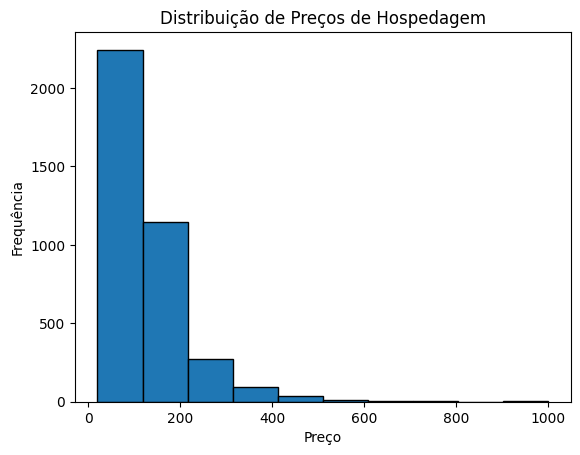

In [ ]:
import matplotlib.pyplot as plt

# Criando o histograma da coluna 'preco'
plt.hist(dados['preco'], bins=10, edgecolor='black')

# Adicionando título e rótulos
plt.title('Distribuição de Preços de Hospedagem')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


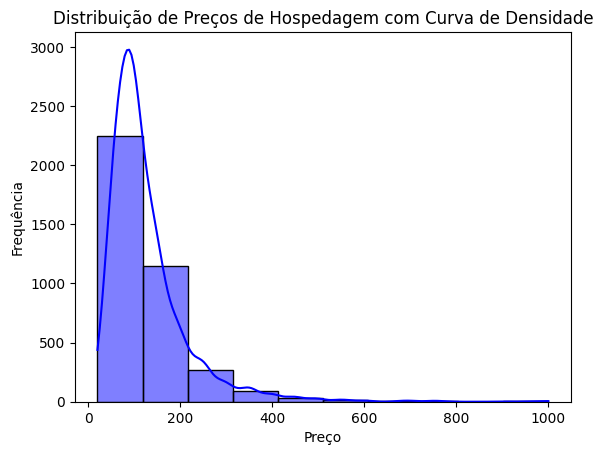

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o histograma com a curva de densidade (KDE)
sns.histplot(dados['preco'], bins=10, kde=True, color='blue')

# Adicionar título e rótulos
plt.title('Distribuição de Preços de Hospedagem com Curva de Densidade')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()


<Axes: xlabel='preco', ylabel='Count'>

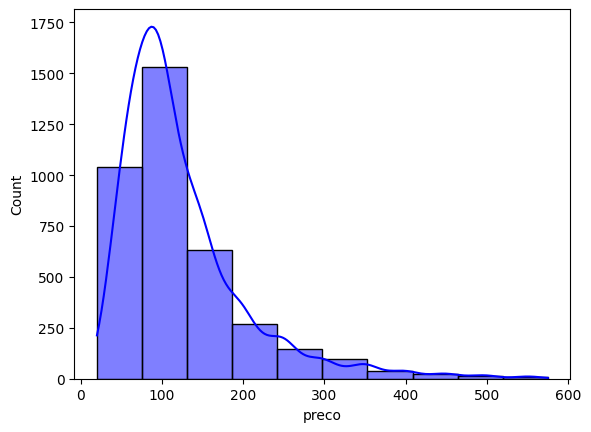

In [ ]:
#crie um histogrma com os valores menores que 600
sns.histplot(dados[dados['preco']<600]['preco'], bins=10, kde=True, color='blue')

#Boxplot

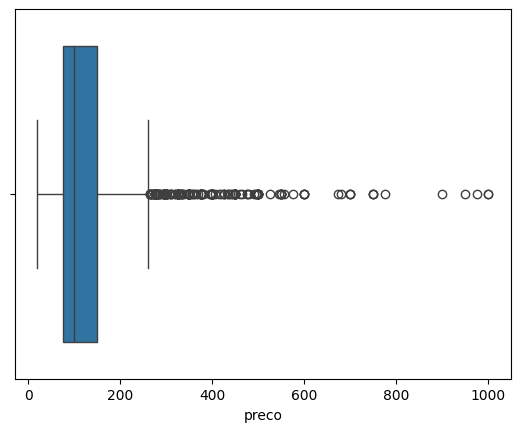

In [ ]:
#crie um bloxplot de preços
sns.boxplot(x=dados['preco']);


In [ ]:
#agrupar dados de preco por numero de hospedes
preco_por_hospedes =dados.groupby('max_hospedes')['preco'].mean()
preco_por_hospedes

,preco
max_hospedes,
1,58.375000
2,91.296865
3,111.600503
4,140.273885
5,181.804348
6,198.572289
7,220.788462
8,295.478992
9,396.153846


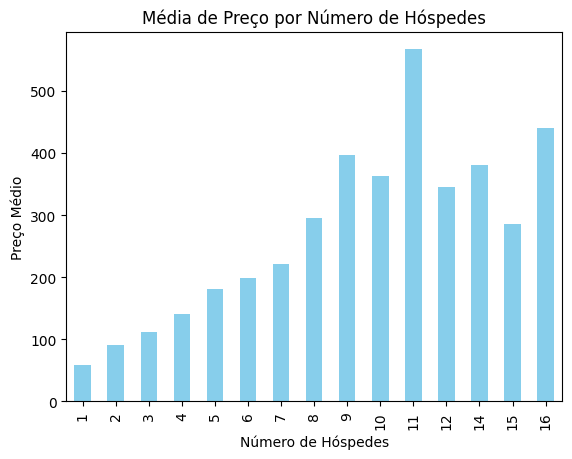

In [ ]:
#Visualização de max_hospedes x media preco_por_hospedes
import matplotlib.pyplot as plt

# Criar o gráfico de barras
preco_por_hospedes.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos
plt.title('Média de Preço por Número de Hóspedes')
plt.xlabel('Número de Hóspedes')
plt.ylabel('Preço Médio')

# Exibir o gráfico
plt.show()


#Conhecendo os dados disponíveis

In [ ]:
dt_date=pd.read_json('/content/moveis_disponiveis.json')
dt_date


,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None
...,...,...,...,...
364995,3279,2016-12-29,True,$140.00
364996,3279,2016-12-30,True,$140.00
364997,3279,2016-12-31,True,$140.00
364998,3279,2017-01-01,True,$140.00


#Verificar se a data já está no tipo correto

In [ ]:
dt_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               365000 non-null  int64 
 1   data             365000 non-null  object
 2   vaga_disponivel  365000 non-null  bool  
 3   preco            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


#Converter a coluna data em tipo datetime

In [ ]:
dt_date['data'] = pd.to_datetime(dt_date['data'])
dt_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


In [ ]:
dt_date.head()

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None


Determinar número de vagas por mês

In [ ]:
dt_date['data'].dt.strftime('%Y-%m')

,data
0,2016-01
1,2016-01
2,2016-01
3,2016-01
4,2016-01
...,...
364995,2016-12
364996,2016-12
364997,2016-12
364998,2017-01


#Agrupando por data, somando vagas disponíveis com groupby:\

In [ ]:
#Agrupando por data, somando vagas disponíveis com groupby:
dt_date.groupby(dt_date['data'].dt.strftime('%Y-%m'))['vaga_disponivel'].sum()


,vaga_disponivel
data,
2016-01,16543
2016-02,20128
2016-03,23357
2016-04,22597
2016-05,23842
2016-06,23651
2016-07,22329
2016-08,22529
2016-09,22471


#Tratando a coluna preco

In [ ]:
# importamos a biblioteca numpy
import numpy as np

# utilizamos o método fillna para preencher os elementos vazios por '0.0'
# definimos o parâmetro de inplace para True para substituir no DataFrame
dt_date['preco'].fillna('0.0', inplace = True)

# apagamos o $ e as vírgulas com apply lambda
dt_date['preco'] = dt_date['preco'].apply(lambda x: x.replace('$', '').replace(',',''))

# transformamos os tipos de dados para float64
dt_date['preco'] = dt_date['preco'].astype(np.float64)

# observamos o resultado final
dt_date

<ipython-input-25-d05a5e09d657>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_date['preco'].fillna('0.0', inplace = True)


,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,0.0
1,857,2016-01-05,False,0.0
2,857,2016-01-06,False,0.0
3,857,2016-01-07,False,0.0
4,857,2016-01-08,False,0.0
...,...,...,...,...
364995,3279,2016-12-29,True,140.0
364996,3279,2016-12-30,True,140.0
364997,3279,2016-12-31,True,140.0
364998,3279,2017-01-01,True,140.0


In [ ]:
dt_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            365000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 11.5 MB


Criar gráficos de linha para visualizar a variação de vagas disponíveis ao longo dos meses.
[texto do link](https://)

In [ ]:
vagas_por_mes = dt_date.groupby(dt_date['data'].dt.strftime('%Y-%m'))['vaga_disponivel'].sum()
vagas_por_mes

,vaga_disponivel
data,
2016-01,16543
2016-02,20128
2016-03,23357
2016-04,22597
2016-05,23842
2016-06,23651
2016-07,22329
2016-08,22529
2016-09,22471


<Axes: xlabel='data'>

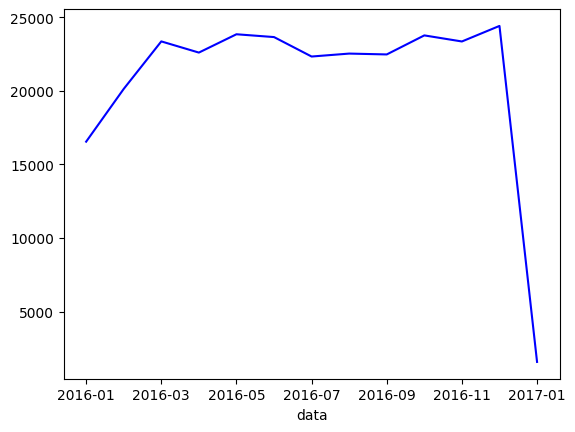

In [ ]:
#Crie um grafico de linha para apresentar as variações nas vagas ao longo dos meses
vagas_por_mes.plot(kind='line', color='blue')


<Axes: xlabel='data'>

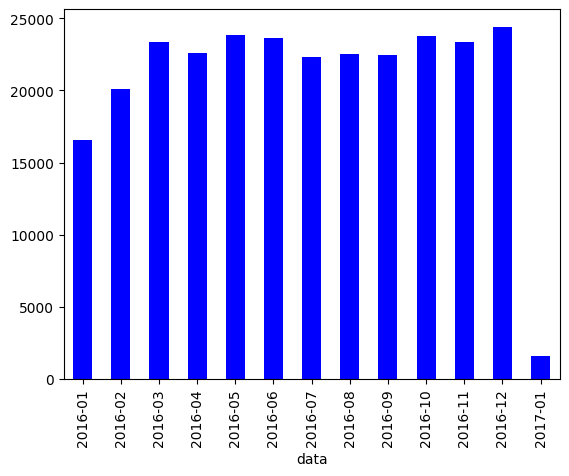

In [ ]:
vagas_por_mes.plot(kind='bar', color='blue')